In [191]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [193]:
!pip install imblearn

In [43]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [44]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [45]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


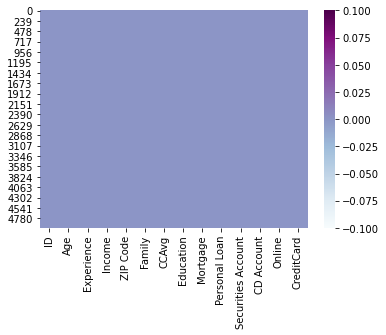

In [6]:
sns.heatmap(data.isnull(),cmap='BuPu',cbar=True)
plt.show()

In [47]:
data.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observations
-Most of the data are normally distributed with few outliers.

-The Minimum value of Experiance is negative , more of investigation is needed to clean this data.


In [452]:
data['Experience'].value_counts()


32.0000    154
20.0000    148
9.0000     147
5.0000     146
23.0000    144
35.0000    143
25.0000    142
28.0000    138
18.0000    137
19.0000    135
26.0000    134
24.0000    131
3.0000     129
14.0000    127
16.0000    127
30.0000    126
34.0000    125
17.0000    125
27.0000    125
29.0000    124
22.0000    124
7.0000     121
15.0000    119
8.0000     119
6.0000     119
10.0000    118
13.0000    117
33.0000    117
11.0000    116
37.0000    116
36.0000    114
21.0000    113
4.0000     113
31.0000    104
12.0000    102
38.0000     88
2.0000      85
39.0000     85
1.0000      74
0.0000      66
40.0000     57
20.1046     52
41.0000     43
42.0000      8
43.0000      3
Name: Experience, dtype: int64

**There are 3 values in the Experiance Column are negative**

In [49]:

data['Experience'][data['Experience'] < 0] = data['Experience'].mean()

<ipython-input-49-eef1d8cafd59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Experience'][data['Experience'] < 0] = data['Experience'].mean()


In [50]:
data['Experience'].value_counts()


32.0000    154
20.0000    148
9.0000     147
5.0000     146
23.0000    144
35.0000    143
25.0000    142
28.0000    138
18.0000    137
19.0000    135
26.0000    134
24.0000    131
3.0000     129
14.0000    127
16.0000    127
30.0000    126
34.0000    125
17.0000    125
27.0000    125
29.0000    124
22.0000    124
7.0000     121
15.0000    119
8.0000     119
6.0000     119
10.0000    118
13.0000    117
33.0000    117
11.0000    116
37.0000    116
36.0000    114
21.0000    113
4.0000     113
31.0000    104
12.0000    102
38.0000     88
2.0000      85
39.0000     85
1.0000      74
0.0000      66
40.0000     57
20.1046     52
41.0000     43
42.0000      8
43.0000      3
Name: Experience, dtype: int64

**The negative values got cleaned and replaced with mean**

In [19]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009406,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994101,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017695,-0.055269,-0.049245,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028564,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045610,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048939,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018243,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013459,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014121,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


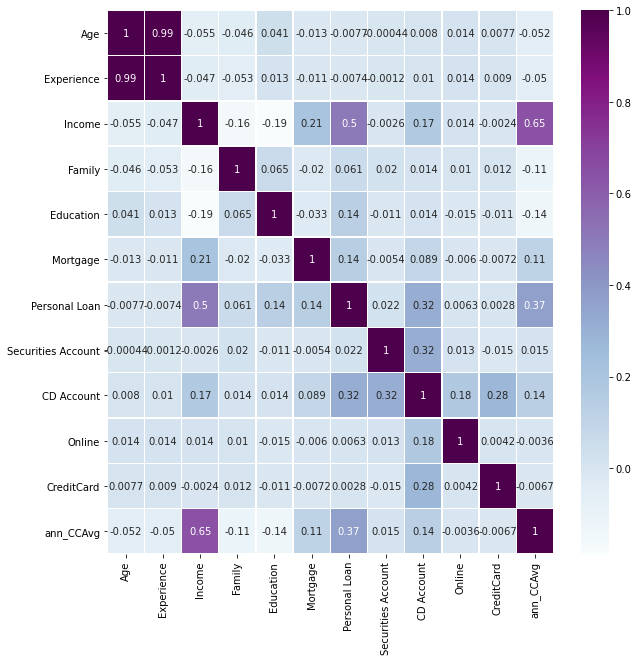

In [195]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

## Visualization of Data

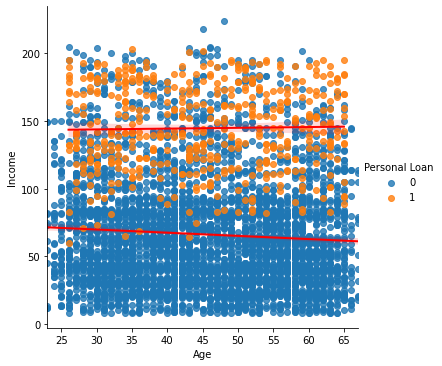

In [21]:
sns.lmplot(x="Age", y="Income", data=data,hue='Personal Loan',line_kws={"lw":2 ,'color': 'red'},height=5);

**Clients with income more than 100k are more likely to get loan**

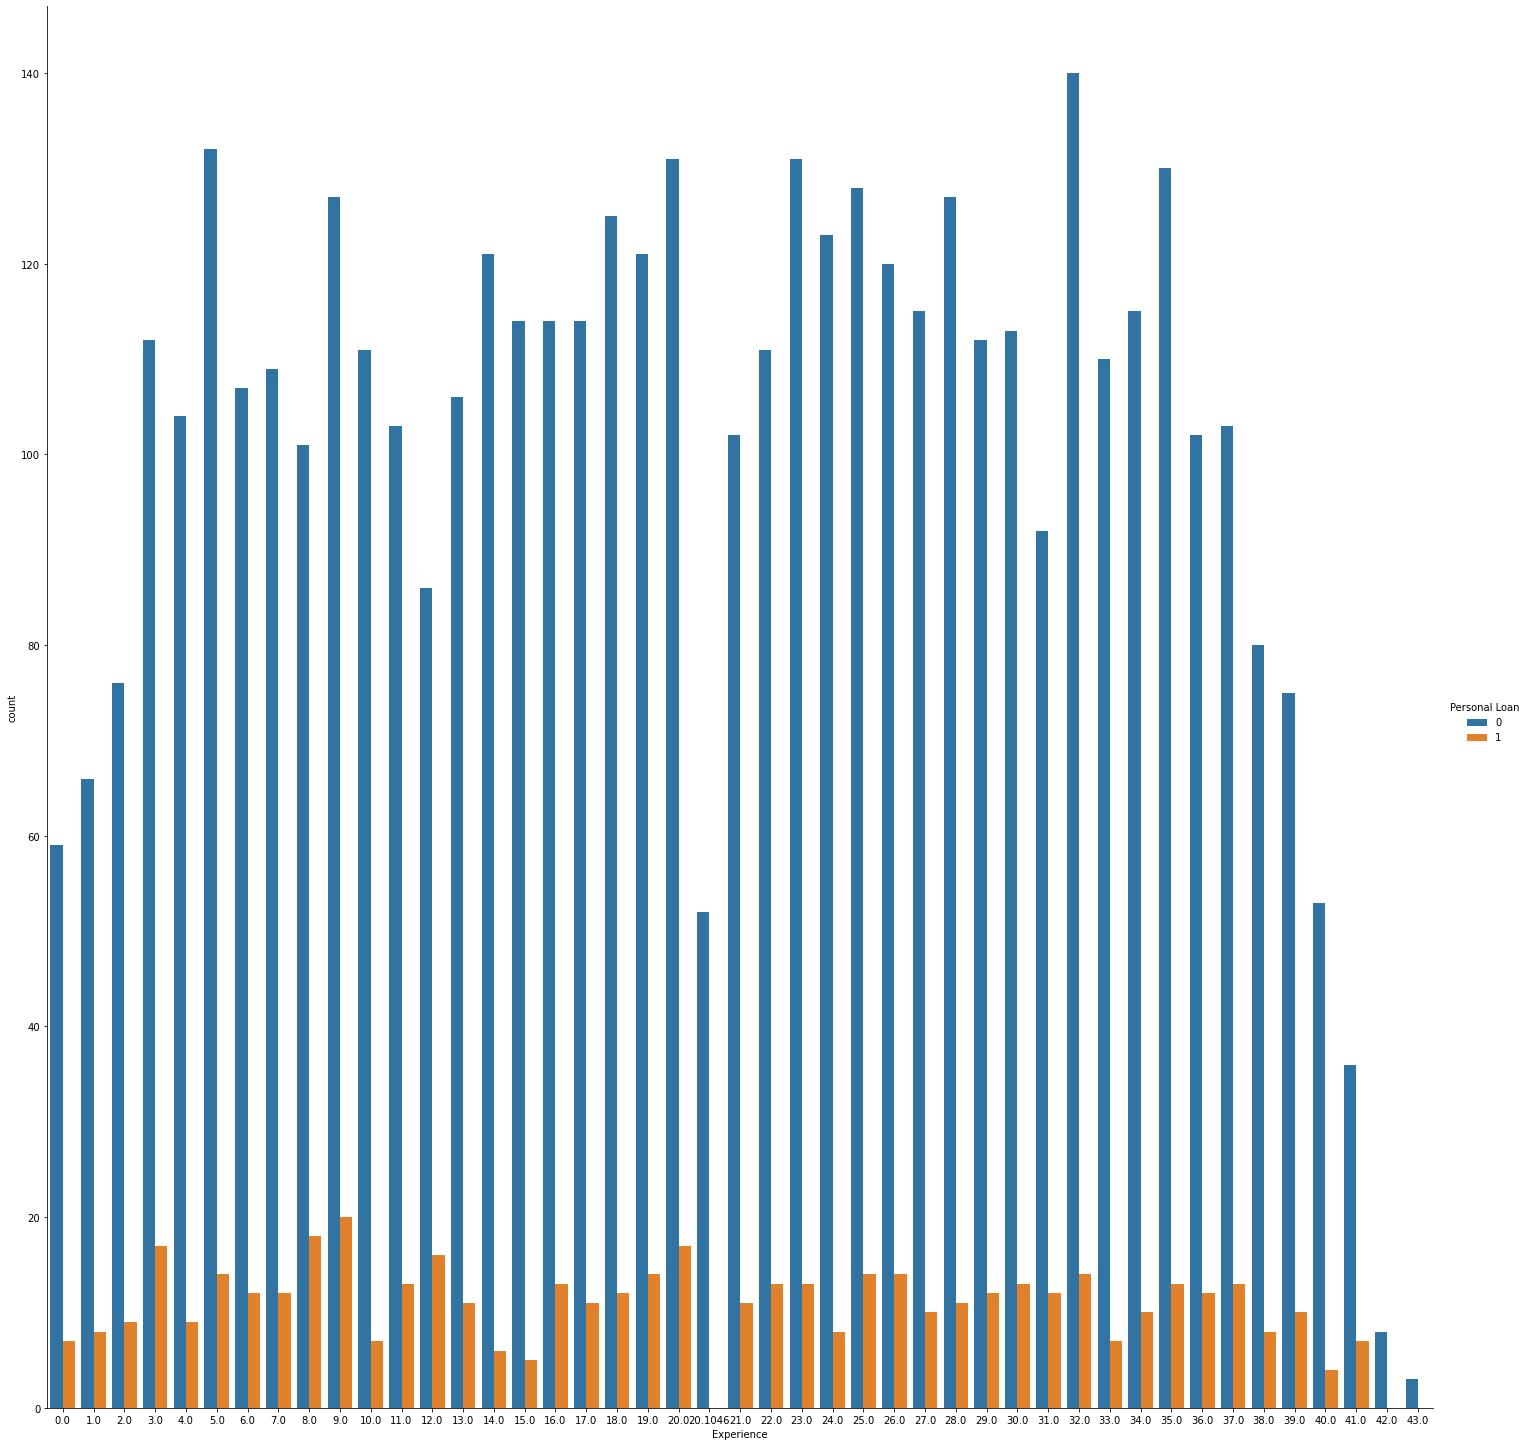

In [60]:
sns.catplot(x="Experience", hue='Personal Loan', kind="count", data=data,height=20, aspect=1)

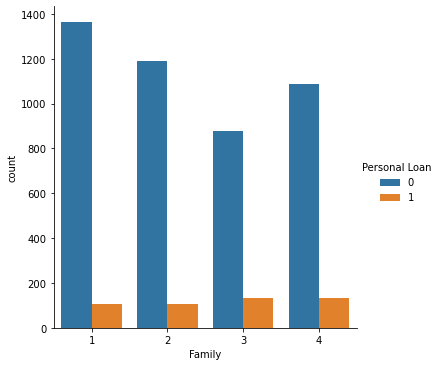

In [46]:
sns.catplot(x="Family", hue='Personal Loan', kind="count", data=data)

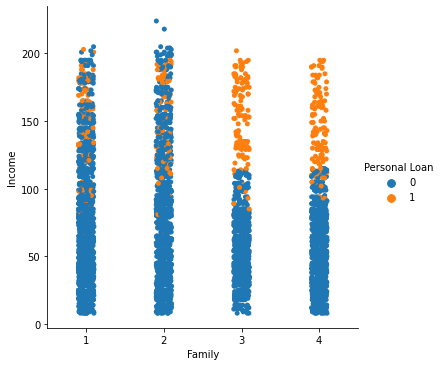

In [201]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data, kind='strip')

## Observations
-it's noticed from the above 2 columns that experiance and family as standalone attributes doesn't affect the personal loan 
while family members with 3 more and income above 100k are more likely to get the loan

-also ID and Zipcode is not affecting the personal loan attribute

<AxesSubplot:xlabel='CreditCard', ylabel='CD Account'>

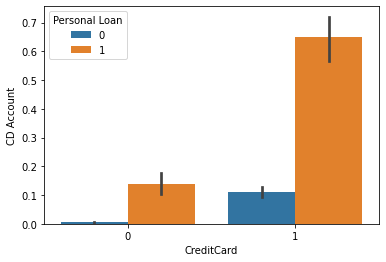

In [128]:
sns.barplot(y="CD Account", x="CreditCard", data=data,hue='Personal Loan')

<AxesSubplot:xlabel='Securities Account', ylabel='CD Account'>

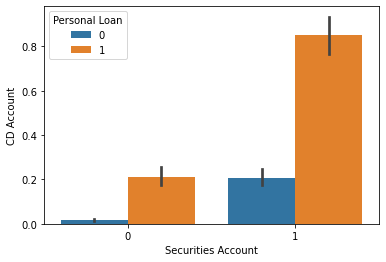

In [126]:
sns.barplot(y="CD Account", x="Securities Account", data=data,hue='Personal Loan')

Text(0.5, 1.0, 'Ann_CCAvg Distribution')

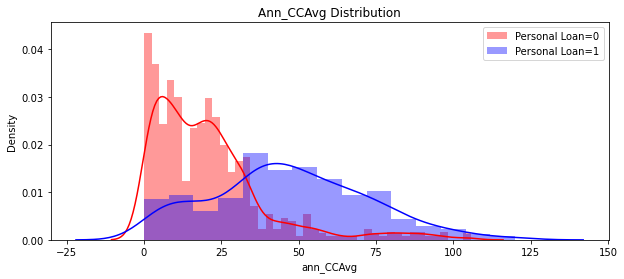

In [454]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal Loan"] == 0]['ann_CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(data[data["Personal Loan"] == 1]['ann_CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Ann_CCAvg Distribution")

### Scaling CCAvg so it would be calculated annually same as income

In [62]:
annual=data['CCAvg']*12
data['ann_CCAvg'] = annual
data.drop('CCAvg', axis=1, inplace=True)
data

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CCAvg
0,1,25,1.0,49,91107,4,1,0,0,1,0,0,0,19.2
1,2,45,19.0,34,90089,3,1,0,0,1,0,0,0,18.0
2,3,39,15.0,11,94720,1,1,0,0,0,0,0,0,12.0
3,4,35,9.0,100,94112,1,2,0,0,0,0,0,0,32.4
4,5,35,8.0,45,91330,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,3,0,0,0,0,1,0,22.8
4996,4997,30,4.0,15,92037,4,1,85,0,0,0,1,0,4.8
4997,4998,63,39.0,24,93023,2,3,0,0,0,0,0,0,3.6
4998,4999,65,40.0,49,90034,3,2,0,0,0,0,1,0,6.0


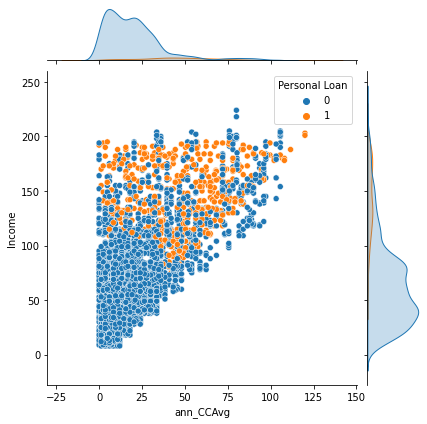

In [7]:
sns.jointplot(x='ann_CCAvg',y='Income', hue='Personal Loan' , data=data,kind='scatter')

In [63]:
data.drop(['ID', 'ZIP Code'], axis = 1, inplace=True) 
data

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CCAvg
0,25,1.0,49,4,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,3,0,0,0,0,1,0,22.8
4996,30,4.0,15,4,1,85,0,0,0,1,0,4.8
4997,63,39.0,24,2,3,0,0,0,0,0,0,3.6
4998,65,40.0,49,3,2,0,0,0,0,1,0,6.0


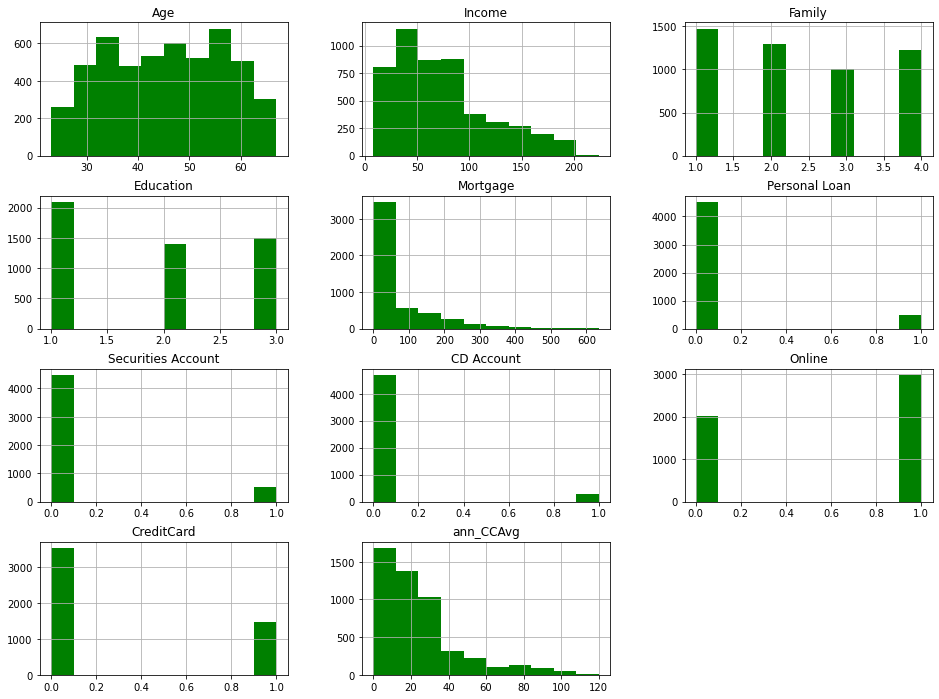

In [141]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

In [64]:
bank_rel = data[['Personal Loan','ann_CCAvg','Mortgage','Securities Account','CD Account','Online','CreditCard']]
bank_rel

,Personal Loan,ann_CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,19.2,0,1,0,0,0
1,0,18.0,0,1,0,0,0
2,0,12.0,0,0,0,0,0
3,0,32.4,0,0,0,0,0
4,0,12.0,0,0,0,0,1
...,...,...,...,...,...,...,...
4995,0,22.8,0,0,0,1,0
4996,0,4.8,85,0,0,1,0
4997,0,3.6,0,0,0,0,0
4998,0,6.0,0,0,0,1,0


In [65]:
cust_att=data[['Personal Loan','Age','Education','Experience','Income']]
cust_att

,Personal Loan,Age,Education,Experience,Income
0,0,25,1,1.0,49
1,0,45,1,19.0,34
2,0,39,1,15.0,11
3,0,35,2,9.0,100
4,0,35,2,8.0,45
...,...,...,...,...,...
4995,0,29,3,3.0,40
4996,0,30,1,4.0,15
4997,0,63,3,39.0,24
4998,0,65,2,40.0,49


In [66]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
ann_CCAvg             0
dtype: int64

## Spliting the data into training and test set in the ratio of 70:30 for my 3 samples

In [111]:
#Sample 1 - bank_rel
from sklearn.model_selection import train_test_split
X_bank = bank_rel.drop('Personal Loan',axis=1).values
Y_bank = bank_rel['Personal Loan'].values.reshape((-1,1))
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, Y_bank, test_size=0.30, random_state=1)
print('x train bank_rel {}'.format(X_bank_train.shape))
print('y train bank_rel {}'.format(y_bank_train.shape))
print('x test bank_rel  {}'.format(X_bank_test.shape))
print('y test bank_rel  {}'.format(y_bank_test.shape))

x train bank_rel (3500, 6)
y train bank_rel (3500, 1)
x test bank_rel  (1500, 6)
y test bank_rel  (1500, 1)


In [112]:
#Sample 2 - cust_att
from sklearn.model_selection import train_test_split
X_cust = cust_att.drop('Personal Loan',axis=1).values
Y_cust = cust_att['Personal Loan'].values.reshape((-1,1))
X_cust_train, X_cust_test, y_cust_train, y_cust_test = train_test_split(X_cust, Y_cust, test_size=0.30, random_state=1)
print('x train cust_att {}'.format(X_cust_train.shape))
print('y train cust_att {}'.format(y_cust_train.shape))
print('x test cust_att  {}'.format(X_cust_test.shape))
print('y test cust_att  {}'.format(y_cust_test.shape))

x train cust_att (3500, 4)
y train cust_att (3500, 1)
x test cust_att  (1500, 4)
y test cust_att  (1500, 1)


In [113]:
#Sample 3 - whole Data
from sklearn.model_selection import train_test_split
X = data.drop('Personal Loan',axis=1).values
Y = data['Personal Loan'].values.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


## Logistic Regression

In [476]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression (C=1.1)

In [497]:
#Sample 1 - bank_rel

lr.fit(X_bank_train,y_bank_train)
y_bank_pred = lr.predict(X_bank_test)
print(lr.score(X_bank_train,y_bank_train))



0.9157142857142857


In [478]:
from sklearn.metrics import accuracy_score

logreg_bank_accuracy = accuracy_score(y_bank_test, y_bank_pred)*100
print('Logistic Regression Model Accuracy Score Sample 1 - bank_rel : %f'  % logreg_bank_accuracy)

Logistic Regression Model Accuracy Score Sample 1 - bank_rel : 90.266667


In [479]:
print(classification_report(y_bank_test,lr.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1351
           1       0.52      0.22      0.31       149

    accuracy                           0.90      1500
   macro avg       0.72      0.60      0.63      1500
weighted avg       0.88      0.90      0.88      1500



In [480]:
#Sample 2 - cust_att

lr.fit(X_cust_train,y_cust_train)
y_cust_pred = lr.predict(X_cust_test)
print(lr.score(X_cust_train,y_cust_train))


0.9437142857142857


In [481]:
logreg_cust_accuracy = accuracy_score(y_cust_test, y_cust_pred)*100
print('Logistic Regression Model Accuracy Score Sample 2 - cust_att : %f'  % logreg_cust_accuracy)

Logistic Regression Model Accuracy Score Sample 2 - cust_att : 94.266667


In [482]:
print(classification_report(y_cust_test,lr.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.52      0.64       149

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [483]:
#Sample 3 - whole Data

lr.fit(X_train,y_train)
y_data_pred = lr.predict(X_test)
print(lr.score(X_train,y_train))

0.9354285714285714


In [484]:
logreg_Data_accuracy = accuracy_score(y_test, y_data_pred)*100
print('Logistic Regression Model Accuracy Score Sample 3 - whole Data : %f'  % logreg_Data_accuracy)

Logistic Regression Model Accuracy Score Sample 3 - whole Data : 93.333333


In [485]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1351
           1       0.75      0.49      0.59       149

    accuracy                           0.93      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.93      0.93      0.93      1500



## it's clear that model with whole data has the highest percentage followed by the customer attribute model due to the high correlation between the customer income and personal loan

# KNN

In [456]:
from sklearn.neighbors import KNeighborsClassifier 
kclf=KNeighborsClassifier (n_neighbors=5)

In [457]:
#Sample 1 - bank_rel

kclf.fit(X_bank_train,y_bank_train)
y_knn_bank_pred = kclf.predict(X_bank_test)
print(kclf.score(X_bank_train,y_bank_train))

0.9294285714285714


In [458]:
KNN_bank_accuracy = accuracy_score(y_bank_test, y_knn_bank_pred)*100
print('KNN Model Accuracy Score Sample 1 - bank_rel : %f'  % KNN_bank_accuracy)

KNN Model Accuracy Score Sample 1 - bank_rel : 89.600000


In [459]:
print(classification_report(y_bank_test,kclf.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1351
           1       0.46      0.27      0.34       149

    accuracy                           0.90      1500
   macro avg       0.69      0.62      0.64      1500
weighted avg       0.88      0.90      0.88      1500



In [460]:
#Sample 2 - cust_att

kclf.fit(X_cust_train,y_cust_train)
y_knn_cust_pred = kclf.predict(X_cust_test)
print(kclf.score(X_cust_train,y_cust_train))

0.9394285714285714


In [461]:
KNN_cust_accuracy = accuracy_score(y_cust_test, y_knn_cust_pred)*100
print('KNN Model Accuracy Score Sample 2 - cust_att : %f'  % KNN_cust_accuracy)

KNN Model Accuracy Score Sample 2 - cust_att : 91.266667


In [462]:
print(classification_report(y_cust_test,kclf.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.60      0.36      0.45       149

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



In [463]:
#Sample 3 - whole data

kclf.fit(X_train,y_train)
y_knn_Data_pred = kclf.predict(X_test)
print(kclf.score(X_train,y_train))

0.9394285714285714


In [464]:
KNN_Data_accuracy = accuracy_score(y_test, y_knn_Data_pred)*100
print('KNN Model Accuracy Score Sample 3 - whole data : %f'  % KNN_Data_accuracy)

KNN Model Accuracy Score Sample 3 - whole data : 91.333333


In [465]:
print(classification_report(y_test,kclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1351
           1       0.58      0.48      0.52       149

    accuracy                           0.91      1500
   macro avg       0.76      0.72      0.74      1500
weighted avg       0.91      0.91      0.91      1500



### It's noticed that the accuracy for KNN Model are almost the same for sample 2 and 3

# Confusion Matrix

In [144]:
from sklearn.svm import SVC

### Sample 1 - bank_rel

In [154]:
svm = SVC(C=4 , kernel='poly')
svm.fit(X_bank_train,y_bank_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=4, kernel='poly')

In [155]:
print(svm.score(X_bank_train,y_bank_train))
print(svm.score(X_bank_test,y_bank_test))


0.9094285714285715
0.9026666666666666


In [156]:
y_cm_bank_pred = svm.predict(X_bank_test)
CM_bank_accuracy = accuracy_score(y_bank_test, y_cm_bank_pred)*100
print('CM Model Accuracy Score Sample 1 - bank_rel : %f'  % CM_bank_accuracy)

CM Model Accuracy Score Sample 1 - bank_rel : 90.266667


In [157]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_bank_test,svm.predict(X_bank_test))

array([[1349,    2],
       [ 144,    5]], dtype=int64)

In [158]:
print(classification_report(y_bank_test,svm.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.71      0.03      0.06       149

    accuracy                           0.90      1500
   macro avg       0.81      0.52      0.51      1500
weighted avg       0.88      0.90      0.86      1500



### Sample 2 - cust_att

In [180]:
svm = SVC(C=4 , kernel='linear')
svm.fit(X_cust_train,y_cust_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=4, kernel='linear')

In [181]:
print(svm.score(X_cust_train,y_cust_train))
print(svm.score(X_cust_test,y_cust_test))


0.9445714285714286
0.9466666666666667


In [182]:
y_cm_cust_pred = svm.predict(X_cust_test)
CM_cust_accuracy = accuracy_score(y_cust_test, y_cm_cust_pred)*100
print('CM Model Accuracy Score Sample 2 - cust_att : %f'  % CM_cust_accuracy)

CM Model Accuracy Score Sample 2 - cust_att : 94.666667


In [170]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_cust_test,svm.predict(X_cust_test))

array([[1343,    8],
       [  72,   77]], dtype=int64)

In [171]:
print(classification_report(y_cust_test,svm.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.91      0.52      0.66       149

    accuracy                           0.95      1500
   macro avg       0.93      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500



### Sample 3 - whole Data

In [173]:
svm = SVC(C=4 , kernel='linear')
svm.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=4, kernel='linear')

In [174]:
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9545714285714286
0.9486666666666667


In [176]:
y_cm_data_pred = svm.predict(X_test)
CM_data_accuracy = accuracy_score(y_test, y_cm_data_pred)*100
print('CM Model Accuracy Score Sample 3 - whole data : %f'  % CM_data_accuracy)

CM Model Accuracy Score Sample 3 - whole data : 94.866667


In [177]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test,svm.predict(X_test))

array([[1341,   10],
       [  67,   82]], dtype=int64)

In [178]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.55      0.68       149

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



# Naive Bayes

In [183]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

### Sample 1 - bank_rel

In [288]:
gnb.fit(X_bank_train,y_bank_train)
from warnings import filterwarnings
filterwarnings("ignore")

In [186]:
print(gnb.score(X_bank_train,y_bank_train))
print(gnb.score(X_bank_test,y_bank_test))

0.8797142857142857
0.8626666666666667


In [383]:
y_gnb_bank_pred = gnb.predict(X_bank_test)
GNB_bank_accuracy = accuracy_score(y_bank_test, y_gnb_bank_pred)*100
print('NB Model Accuracy Score Sample 1 - bank_rel : %f'  % GNB_bank_accuracy)

NB Model Accuracy Score Sample 1 - bank_rel : 86.266667


In [187]:
print(classification_report(y_bank_test,gnb.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1351
           1       0.33      0.37      0.35       149

    accuracy                           0.86      1500
   macro avg       0.63      0.64      0.64      1500
weighted avg       0.87      0.86      0.87      1500



### Sample 2 - cust_att


In [385]:
gnb.fit(X_cust_train,y_cust_train)

GaussianNB()

In [386]:
print(gnb.score(X_cust_train,y_cust_train))
print(gnb.score(X_cust_test,y_cust_test))


0.9222857142857143
0.924


In [387]:
y_gnb_cust_pred = gnb.predict(X_cust_test)
GNB_cust_accuracy = accuracy_score(y_cust_test, y_gnb_cust_pred)*100
print('NB Model Accuracy Score Sample 2 - Cust_att : %f'  % GNB_cust_accuracy)

NB Model Accuracy Score Sample 2 - Cust_att : 92.400000


In [275]:
print(classification_report(y_cust_test,gnb.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1351
           1       0.65      0.48      0.56       149

    accuracy                           0.92      1500
   macro avg       0.80      0.73      0.76      1500
weighted avg       0.92      0.92      0.92      1500



### Sample 3 - whole Data


In [388]:
gnb.fit(X_train,y_train)

GaussianNB()

In [389]:
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))

0.89
0.8753333333333333


In [390]:
y_gnb_data_pred = gnb.predict(X_test)
GNB_data_accuracy = accuracy_score(y_test, y_gnb_data_pred)*100
print('NB Model Accuracy Score Sample 3 - Whole-Data : %f'  % GNB_data_accuracy)

NB Model Accuracy Score Sample 3 - Whole-Data : 87.533333


In [281]:
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



# Observations:

### After investigating the above Models on the 3 different samples am working on , we can clearly see that k-Nearest Neighbors Alogorithm gives us best accuracy of 94% on 2 different samples therefor KNN would be the best choice to predict the customers who will accept the personal loan.  

# Detecting  Data imbalancing

In [203]:
loan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


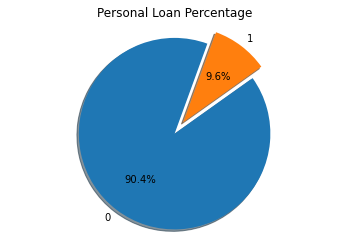

In [211]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
fig1.patch.set_facecolor('white')
plt.show()

### It's Noticed that the data is imbalanced , we will treat the biasing of imbalanced data then recheck the accuracy of our models 

In [194]:
from imblearn.over_sampling import SMOTE
ms=SMOTE(random_state=)


In [240]:
#Sample 1.1 - bank_rel_res
X_ms_bank , y_ms_bank = ms.fit_resample(X_bank,Y_bank)
from sklearn.model_selection import train_test_split
X_bank_train_res, X_bank_test_res, y_bank_train_res, y_bank_test_res = train_test_split(X_ms_bank, y_ms_bank, test_size=0.30, random_state=1)
y_bank_train_ress=y_bank_train_res.reshape(-1,1)
y_bank_test_ress=y_bank_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_bank_train_res.shape))
print('y train bank_rel_res {}'.format(y_bank_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_bank_test_res.shape))
print('y test bank_rel_res  {}'.format(y_bank_test_ress.shape))

x train bank_rel_res (6328, 6)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 6)
y test bank_rel_res  (2712, 1)


In [241]:
#Sample 2.2 - cust_att_res
X_ms_cust , y_ms_cust = ms.fit_resample(X_cust,Y_cust)
from sklearn.model_selection import train_test_split
X_cust_train_res, X_cust_test_res, y_cust_train_res, y_cust_test_res = train_test_split(X_ms_cust, y_ms_cust, test_size=0.30, random_state=1)
y_cust_train_ress=y_cust_train_res.reshape(-1,1)
y_cust_test_ress=y_cust_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_cust_train_res.shape))
print('y train bank_rel_res {}'.format(y_cust_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_cust_test_res.shape))
print('y test bank_rel_res  {}'.format(y_cust_test_ress.shape))

x train bank_rel_res (6328, 4)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 4)
y test bank_rel_res  (2712, 1)


In [242]:
#Sample 3.3 -whole data_res
X_ms_data , y_ms_data = ms.fit_resample(X,Y)
from sklearn.model_selection import train_test_split
X_data_train_res, X_data_test_res, y_data_train_res, y_data_test_res = train_test_split(X_ms_data,y_ms_data, test_size=0.30, random_state=1)
y_data_train_ress=y_data_train_res.reshape(-1,1)
y_data_test_ress=y_data_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_data_train_res.shape))
print('y train bank_rel_res {}'.format(y_data_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_data_test_res.shape))
print('y test bank_rel_res  {}'.format(y_data_test_ress.shape))

x train bank_rel_res (6328, 11)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 11)
y test bank_rel_res  (2712, 1)


## Logistic Regression After Scaling imbalanced data

In [486]:
from sklearn.linear_model import LogisticRegression
lrr=LogisticRegression (C=1.1)

In [487]:
#Sample 1.1 - bank_rel_res
from warnings import filterwarnings
filterwarnings("ignore")
lrr.fit(X_bank_train_res,y_bank_train_ress)
y_bank_pred_res = lrr.predict(X_bank_test_res)
print(lrr.score(X_bank_train_res,y_bank_train_ress))



0.7948798988621998


In [488]:
from sklearn.metrics import accuracy_score
logreg_bank_accuracy_res = accuracy_score(y_bank_test_res, y_bank_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 1.1 - bank_rel_resamle : %f'  % logreg_bank_accuracy_res)

Logistic Regression Model Accuracy Score Sample 1.1 - bank_rel_resamle : 79.609145


In [489]:
print(classification_report(y_bank_test_res,lrr.predict(X_bank_test_res)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1350
           1       0.82      0.75      0.79      1362

    accuracy                           0.80      2712
   macro avg       0.80      0.80      0.80      2712
weighted avg       0.80      0.80      0.80      2712



In [490]:
#Sample 2.2 - cust_att_res
from warnings import filterwarnings
filterwarnings("ignore")
lrr.fit(X_cust_train_res,y_cust_train_ress)
y_cust_pred_res = lrr.predict(X_cust_test_res)
print(lrr.score(X_cust_train_res,y_cust_train_ress))

0.870417193426043


In [491]:
from sklearn.metrics import accuracy_score
logreg_cust_accuracy_res = accuracy_score(y_cust_test_res, y_cust_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 2.2 - cust_att_resamle : %f'  % logreg_cust_accuracy_res)

Logistic Regression Model Accuracy Score Sample 2.2 - cust_att_resamle : 87.463127


In [492]:
print(classification_report(y_cust_test_res,lrr.predict(X_cust_test_res)))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1350
           1       0.87      0.88      0.88      1362

    accuracy                           0.87      2712
   macro avg       0.87      0.87      0.87      2712
weighted avg       0.87      0.87      0.87      2712



In [493]:
#Sample 3.3 -whole data_res
from warnings import filterwarnings
filterwarnings("ignore")
lrr.fit(X_data_train_res,y_data_train_ress)
y_data_pred_res = lrr.predict(X_data_test_res)
print(lrr.score(X_data_train_res,y_data_train_ress))

0.8985461441213654


In [494]:
from sklearn.metrics import accuracy_score
logreg_data_accuracy_res = accuracy_score(y_data_test_res, y_data_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : %f'  % logreg_data_accuracy_res)

Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : 89.343658


In [495]:
print(classification_report(y_data_test_res,lrr.predict(X_data_test_res)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1350
           1       0.89      0.90      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



# KNN After Scaling imbalanced data

In [466]:
from sklearn.neighbors import KNeighborsClassifier 
kclsf=KNeighborsClassifier (n_neighbors=1)



In [467]:
#Sample 1.1 - bank_rel_res

kclsf.fit(X_bank_train_res,y_bank_train_ress)
y_knn_bank_pred = kclsf.predict(X_bank_test_res)
print(kclsf.score(X_bank_train_res,y_bank_train_ress))


0.959070796460177


In [468]:
KNN_bank_accuracy_res = accuracy_score(y_bank_test_res, y_bank_pred_res)*100
print('KNN Model Accuracy Score Sample 1.1 - bank_rel_resample : %f'  % KNN_bank_accuracy_res)

KNN Model Accuracy Score Sample 1.1 - bank_rel_resample : 79.609145


In [469]:
print(classification_report(y_bank_test_res,kclsf.predict(X_bank_test_res)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1350
           1       0.91      0.87      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



In [470]:
#Sample 2.2 - cust_att_res
kclsf.fit(X_cust_train_res,y_cust_train_ress)
y_knn_cust_pred = kclsf.predict(X_cust_test_res)
print(kclsf.score(X_cust_train_res,y_cust_train_ress))

0.9987357774968394


In [471]:
KNN_cust_accuracy_res = accuracy_score(y_cust_test_res, y_cust_pred_res)*100
print('KNN Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % KNN_cust_accuracy_res)

KNN Model Accuracy Score Sample 2.2 - cust_att_resample : 87.463127


In [472]:
print(classification_report(y_cust_test_res,kclsf.predict(X_cust_test_res)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1350
           1       0.90      0.98      0.93      1362

    accuracy                           0.93      2712
   macro avg       0.93      0.93      0.93      2712
weighted avg       0.93      0.93      0.93      2712



In [473]:
#Sample 3.3 -whole data_res
kclsf.fit(X_data_train_res,y_data_train_ress)
y_knn_data_pred = kclsf.predict(X_data_test_res)
print(kclsf.score(X_data_train_res,y_data_train_ress))

1.0


In [474]:
KNN_data_accuracy_res = accuracy_score(y_data_test_res, y_data_pred_res)*100
print('KNN Model Accuracy Score Sample 3.3 - whole data_resample : %f'  % KNN_data_accuracy_res)

KNN Model Accuracy Score Sample 3.3 - whole data_resample : 89.343658


In [475]:
print(classification_report(y_data_test_res,kclsf.predict(X_data_test_res)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1350
           1       0.94      0.99      0.96      1362

    accuracy                           0.96      2712
   macro avg       0.96      0.96      0.96      2712
weighted avg       0.96      0.96      0.96      2712



# Confusion Matrix After Scaling

In [328]:
from sklearn.svm import SVC

### Sample 1.1 - bank_rel_res

In [330]:
svmm = SVC(C=4 , kernel='poly')
svmm.fit(X_bank_train_res,y_bank_train_ress)

SVC(C=4, kernel='poly')

In [331]:
print(svmm.score(X_bank_train_res,y_bank_train_ress))
print(svmm.score(X_bank_test_res,y_bank_test_ress))

0.70448798988622
0.7112831858407079


In [332]:
y_cm_bank_pred_res = svmm.predict(X_bank_test_res)
CM_bank_accuracy_res = accuracy_score(y_bank_test_ress, y_cm_bank_pred_res)*100
print('CM Model Accuracy Score Sample 1 - bank_rel_resample : %f'  % CM_bank_accuracy_res)

CM Model Accuracy Score Sample 1 - bank_rel_resample : 71.128319


In [333]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_bank_test_ress,svmm.predict(X_bank_test_res))

array([[1235,  115],
       [ 668,  694]], dtype=int64)

In [334]:
print(classification_report(y_bank_test_ress,svmm.predict(X_bank_test_res)))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1350
           1       0.86      0.51      0.64      1362

    accuracy                           0.71      2712
   macro avg       0.75      0.71      0.70      2712
weighted avg       0.75      0.71      0.70      2712



### Sample 2.2 - cust_att_res

In [335]:
svmm.fit(X_cust_train_res,y_cust_train_ress)

SVC(C=4, kernel='poly')

In [336]:
print(svmm.score(X_cust_train_res,y_cust_train_ress))
print(svmm.score(X_cust_test_res,y_cust_test_ress))

0.8810050568900126
0.8845870206489675


In [337]:
y_cm_cust_pred_res = svmm.predict(X_cust_test_res)
CM_cust_accuracy_res = accuracy_score(y_cust_test_ress, y_cm_cust_pred_res)*100
print('CM Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % CM_cust_accuracy_res)

CM Model Accuracy Score Sample 2.2 - cust_att_resample : 88.458702


In [338]:
confusion_matrix(y_cust_test_ress,svmm.predict(X_cust_test_res))

array([[1161,  189],
       [ 124, 1238]], dtype=int64)

In [339]:
print(classification_report(y_cust_test_ress,svmm.predict(X_cust_test_res)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1350
           1       0.87      0.91      0.89      1362

    accuracy                           0.88      2712
   macro avg       0.89      0.88      0.88      2712
weighted avg       0.89      0.88      0.88      2712



### Sample 3.3 - whole Data_res

In [340]:
svmm.fit(X_data_train_res,y_data_train_ress)

SVC(C=4, kernel='poly')

In [341]:
print(svmm.score(X_data_train_res,y_data_train_ress))
print(svmm.score(X_data_test_res,y_data_test_ress))

0.888432364096081
0.8919616519174042


In [342]:
y_cm_data_pred_res = svmm.predict(X_data_test_res)
CM_data_accuracy_res = accuracy_score(y_data_test_ress, y_cm_data_pred_res)*100
print('CM Model Accuracy Score Sample 3.3 - whole_data_resample : %f'  % CM_data_accuracy_res)

CM Model Accuracy Score Sample 3.3 - whole_data_resample : 89.196165


In [365]:
confusion_matrix(y_data_test_ress,svmm.predict(X_data_test_res))

array([[1183,  167],
       [ 126, 1236]], dtype=int64)

In [344]:
print(classification_report(y_data_test_ress,svmm.predict(X_data_test_res)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1350
           1       0.88      0.91      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



# Naive Bayes After Scaling

In [392]:
from sklearn.naive_bayes import GaussianNB
ganb= GaussianNB()


### Sample 1.1 - bank_rel_res

In [393]:
ganb.fit(X_bank_train_res,y_bank_train_ress)
from warnings import filterwarnings
filterwarnings("ignore")


In [394]:
print(ganb.score(X_bank_train_res,y_bank_train_ress))
print(ganb.score(X_bank_test_res,y_bank_test_ress))


0.754582806573957
0.7477876106194691


In [395]:
y_gnb_bank_pred_res = ganb.predict(X_bank_test_res)
GNB_bank_accuracy_res = accuracy_score(y_bank_test_ress, y_gnb_bank_pred_res)*100
print('NB Model Accuracy Score Sample 1.1 - bank_rel_resample : %f'  % GNB_bank_accuracy_res)

NB Model Accuracy Score Sample 1.1 - bank_rel_resample : 74.778761


In [396]:
print(classification_report(y_bank_test_ress,ganb.predict(X_bank_test_res)))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1350
           1       0.84      0.62      0.71      1362

    accuracy                           0.75      2712
   macro avg       0.77      0.75      0.74      2712
weighted avg       0.77      0.75      0.74      2712



### Sample 2.2 - cust_att_res

In [398]:
ganb.fit(X_cust_train_res,y_cust_train_res)
from warnings import filterwarnings
filterwarnings("ignore")


In [399]:
print(ganb.score(X_cust_train_res,y_cust_train_res))
print(ganb.score(X_cust_test_res,y_cust_test_ress))


0.8776864728192162
0.8790560471976401


In [400]:
y_gnb_cust_pred_res = ganb.predict(X_cust_test_res)
GNB_cust_accuracy_res = accuracy_score(y_cust_test_ress, y_gnb_cust_pred_res)*100
print('NB Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % GNB_cust_accuracy_res)

NB Model Accuracy Score Sample 2.2 - cust_att_resample : 87.905605


In [401]:
print(classification_report(y_cust_test_ress,ganb.predict(X_cust_test_res)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1350
           1       0.88      0.88      0.88      1362

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



### Sample 3.3 - whole Data_res

In [402]:
ganb.fit(X_data_train_res,y_data_train_ress)
from warnings import filterwarnings
filterwarnings("ignore")


In [403]:
print(ganb.score(X_data_train_res,y_data_train_ress))
print(ganb.score(X_data_test_res,y_data_test_ress))

0.8596713021491783
0.8547197640117994


In [404]:
y_gnb_data_pred_res = ganb.predict(X_data_test_res)
GNB_data_accuracy_res = accuracy_score(y_data_test_ress, y_gnb_data_pred_res)*100
print('NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : %f'  % GNB_data_accuracy_res)

NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : 85.471976


In [381]:
print(classification_report(y_data_test_ress,ganb.predict(X_data_test_res)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1350
           1       0.88      0.82      0.85      1362

    accuracy                           0.85      2712
   macro avg       0.86      0.85      0.85      2712
weighted avg       0.86      0.85      0.85      2712



### Customers who have income above 100k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.


we can clearly see that k-Nearest Neighbors Algorithm with scaled data gives us best accuracy of 96%. With the whole Data Features.
